In [1]:
#Load all the required python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
#Loading the data set into a data frame
df = pd.read_csv("Suicide Rates Overview 1985 to 2016 Data.CSV")

In [3]:
df.shape

(27820, 12)

In [4]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
#renaming the column names for convenience
df.columns = ['country', 'year', 'gender', 'age', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI_for_year',
                'gdp_for_year', 'gdp_per_capita', 'generation']

In [7]:
df.describe()

,year,suicide_count,population,suicide_rate,HDI_for_year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [8]:
df.isnull().sum()

country               0
year                  0
gender                0
age                   0
suicide_count         0
population            0
suicide_rate          0
country-year          0
HDI_for_year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

In [9]:
#TO CHECK IF THERE ARE ANY DUPLICATE ROWS
duplicate = df[df.duplicated()]
duplicate

,country,year,gender,age,suicide_count,population,suicide_rate,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation


SINCE THE DUPLICATE DATA FRAME IS EMPTy, THE DATASET DOES NOT HAVE ANY DUPLICATE ROWS.

In [10]:
null_percentage = df['HDI_for_year'].isnull().sum() / len(df) * 100
null_percentage

69.93529834651329

In [11]:
df=df.drop(['country-year','HDI_for_year'], axis = 1) 

In [12]:
df['gdp_for_year'] = df['gdp_for_year'].str.replace(',','').astype(float) #To convert the column into float
  

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   gdp_for_year    27820 non-null  float64
 8   gdp_per_capita  27820 non-null  int64  
 9   generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 2.1+ MB


In [14]:
df.head()

,country,year,gender,age,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2.156625e+09,796,Boomers


In [15]:
#Checking number of unique categories for categorical variables
df.age.value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

In [16]:
df.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [17]:
len(df.country.unique())

101

array([[<AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'suicide_count'}>],
       [<AxesSubplot: title={'center': 'population'}>,
        <AxesSubplot: title={'center': 'suicide_rate'}>],
       [<AxesSubplot: title={'center': 'gdp_for_year'}>,
        <AxesSubplot: title={'center': 'gdp_per_capita'}>]], dtype=object)

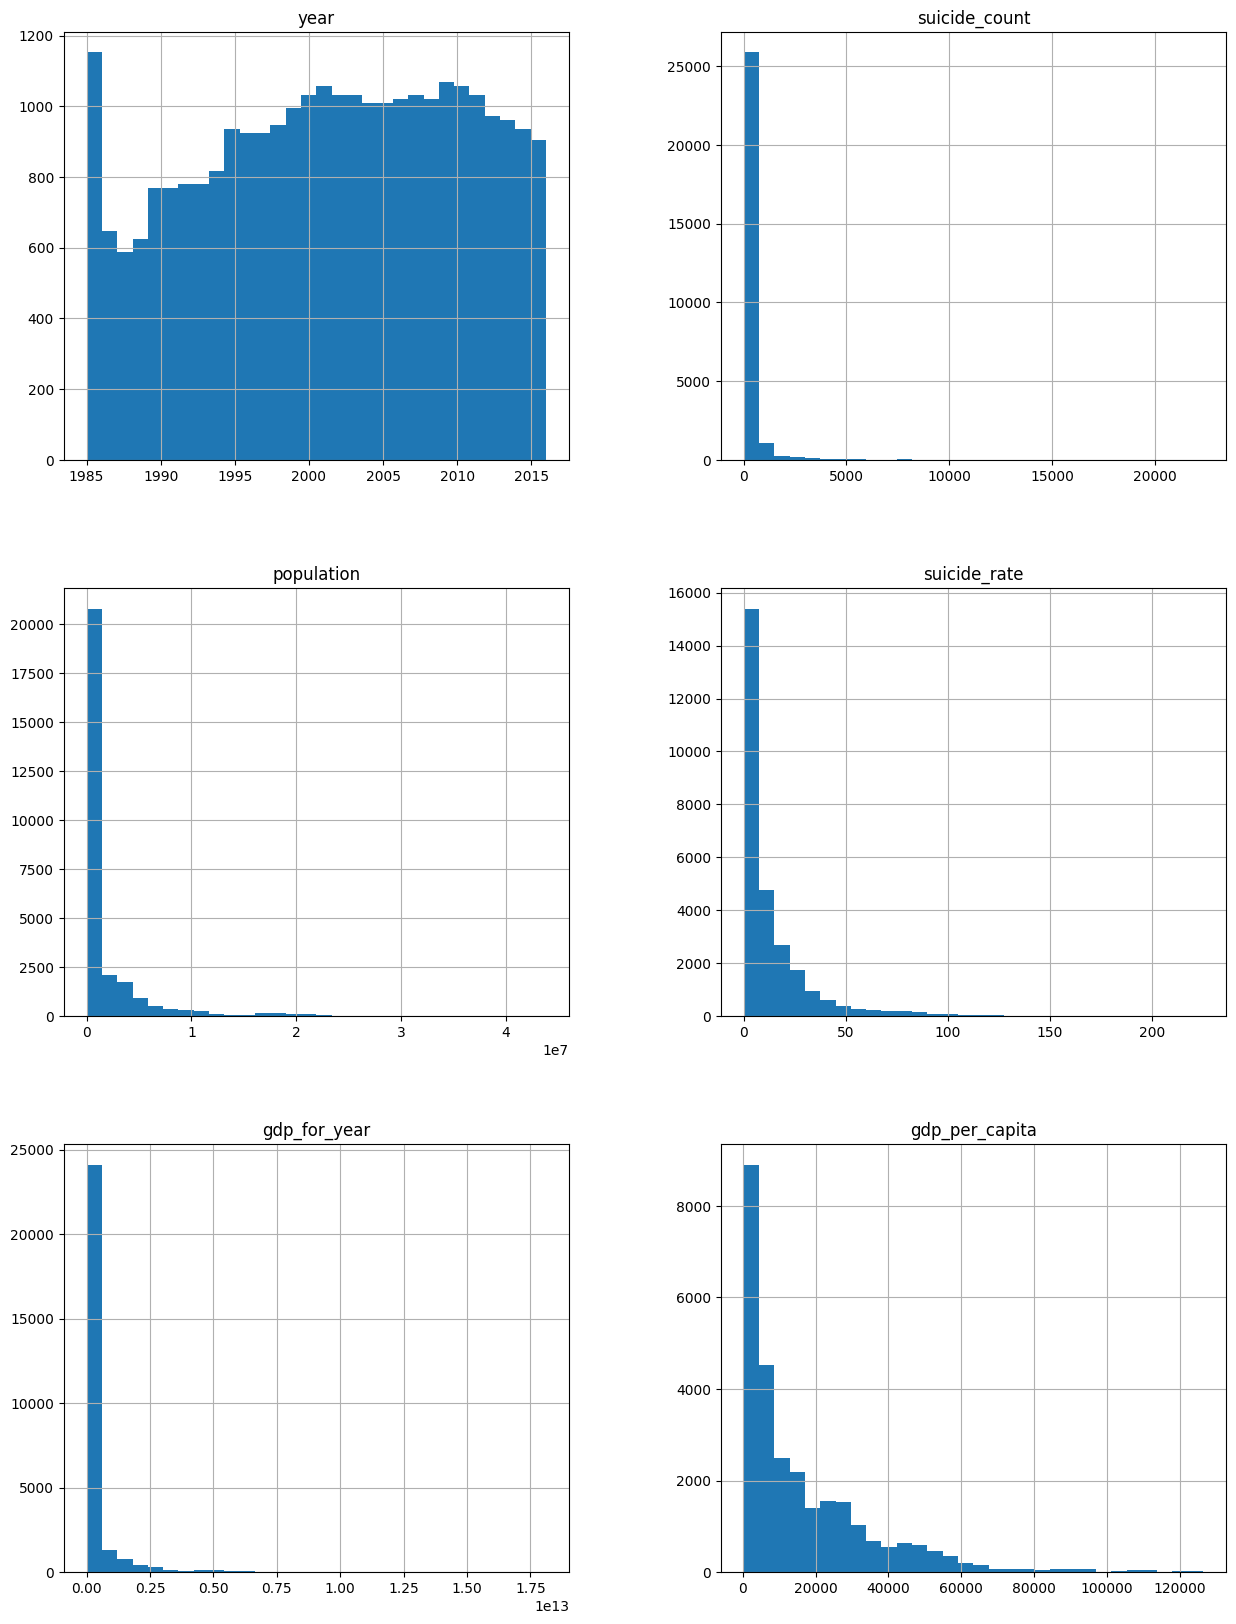

In [18]:
df.hist(bins = 30,figsize = (15,20))

                    year  suicide_count  population  suicide_rate  \
year            1.000000      -0.004546    0.008850     -0.039037   
suicide_count  -0.004546       1.000000    0.616162      0.306604   
population      0.008850       0.616162    1.000000      0.008285   
suicide_rate   -0.039037       0.306604    0.008285      1.000000   
gdp_for_year    0.094529       0.430096    0.710697      0.025240   
gdp_per_capita  0.339134       0.061330    0.081510      0.001785   

                gdp_for_year  gdp_per_capita  
year                0.094529        0.339134  
suicide_count       0.430096        0.061330  
population          0.710697        0.081510  
suicide_rate        0.025240        0.001785  
gdp_for_year        1.000000        0.303405  
gdp_per_capita      0.303405        1.000000  


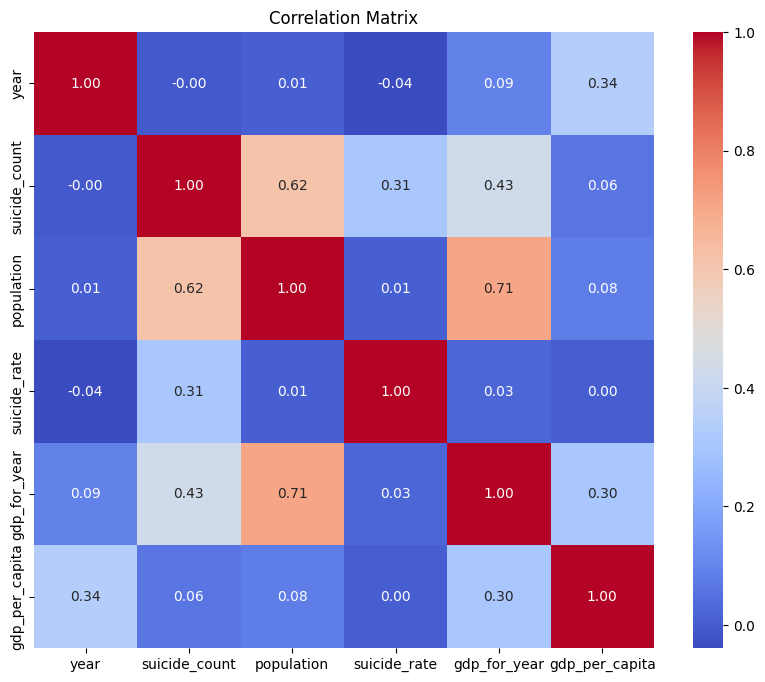

In [19]:
# Relationships between variables
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [20]:
df.head()

,country,year,gender,age,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2.156625e+09,796,Boomers


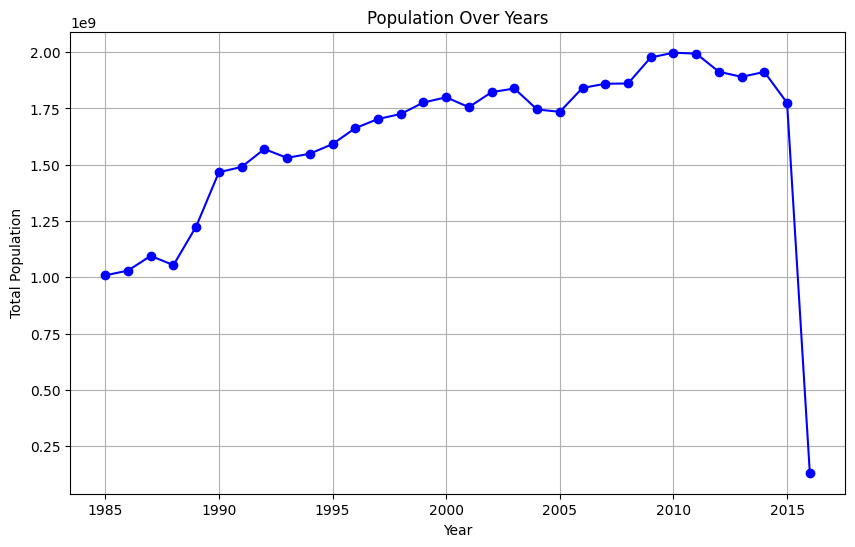

In [21]:
population_over_years = df.groupby('year')['population'].sum().reset_index()

# Plotting the population over years
plt.figure(figsize=(10, 6))
plt.plot(population_over_years['year'], population_over_years['population'], marker='o', linestyle='-', color='b')
plt.title('Population Over Years')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.grid(True)
plt.show()

In [22]:
df = df[df['year'] != 2016]

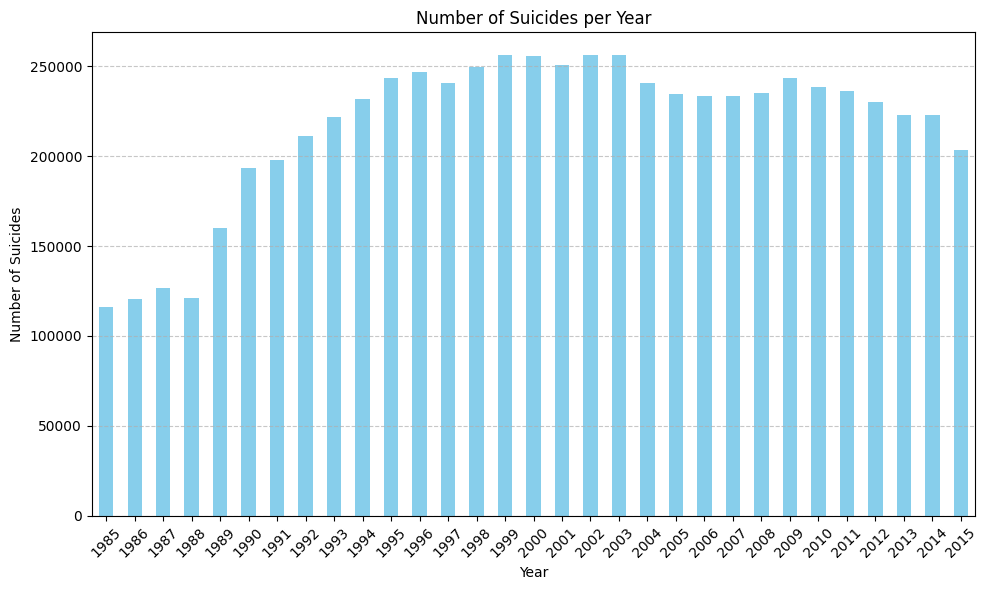

In [23]:
suicides_per_year = df.groupby('year')['suicide_count'].sum()

# Creating the bar plot
plt.figure(figsize=(10, 6))
suicides_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Suicides per Year')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### The year 1999 has most number of suicides where as 1985 is the year with less number of suicides

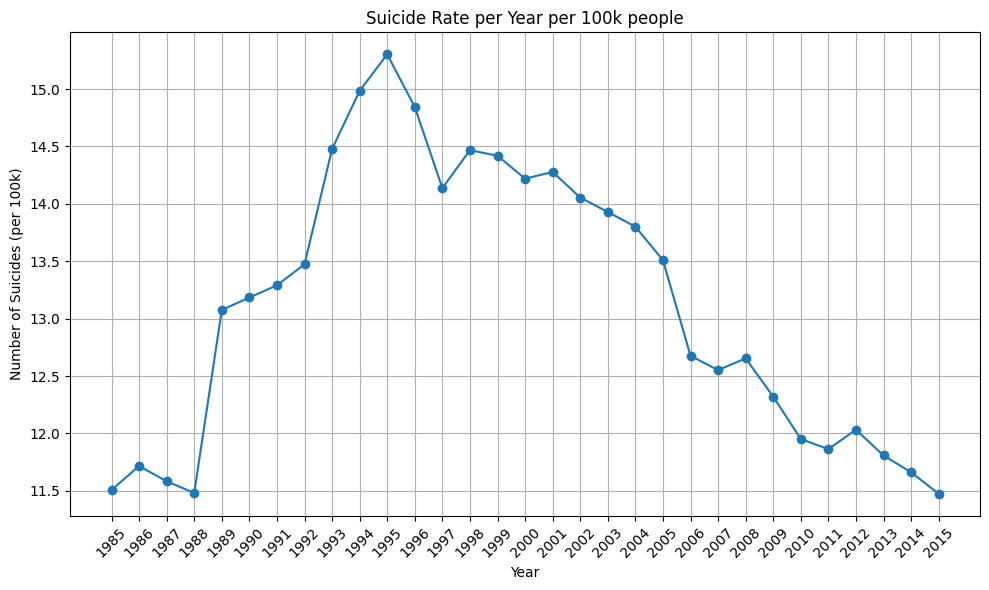

In [24]:
df['year'] = pd.to_numeric(df['year'])

# Group the data by year and calculate the sum of suicides and sum of population
grouped = df.groupby('year').agg({'suicide_count': 'sum', 'population': 'sum'})

# Calculate suicide rate (sum of suicides / sum of population)
grouped['suicide_rate'] = (grouped['suicide_count'] / grouped['population']) * 100000

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped['suicide_rate'], marker='o', linestyle='-')
plt.title('Suicide Rate per Year per 100k people')
plt.xlabel('Year')
plt.ylabel('Number of Suicides (per 100k)')
plt.grid(True)
plt.xticks(grouped.index, rotation=45)
plt.tight_layout()
plt.show()

#### Suicide rate is higher in  the year 1995 where as it is least in the year 2015

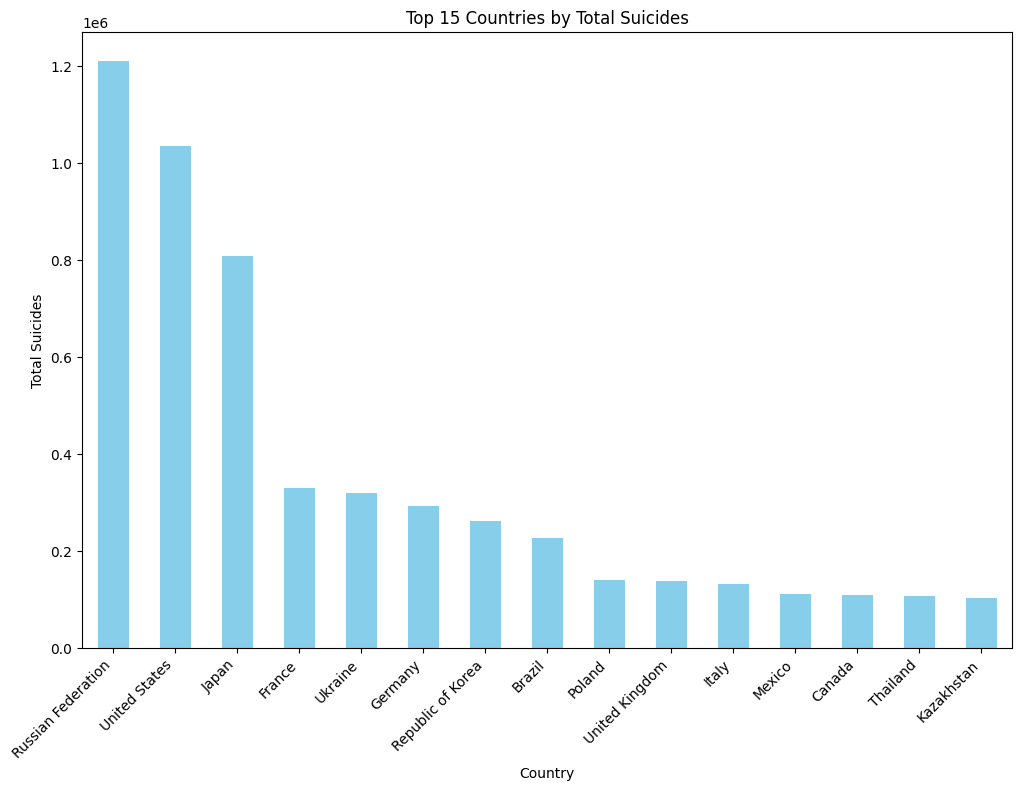

In [25]:
import matplotlib.pyplot as plt

# Calculate total suicides per country
suicides_by_country = df.groupby('country')['suicide_count'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
suicides_by_country.head(15).plot(kind='bar', color='skyblue')
plt.title('Top 15 Countries by Total Suicides')
plt.xlabel('Country')
plt.ylabel('Total Suicides')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Russian Federation is the country with most number of suicides

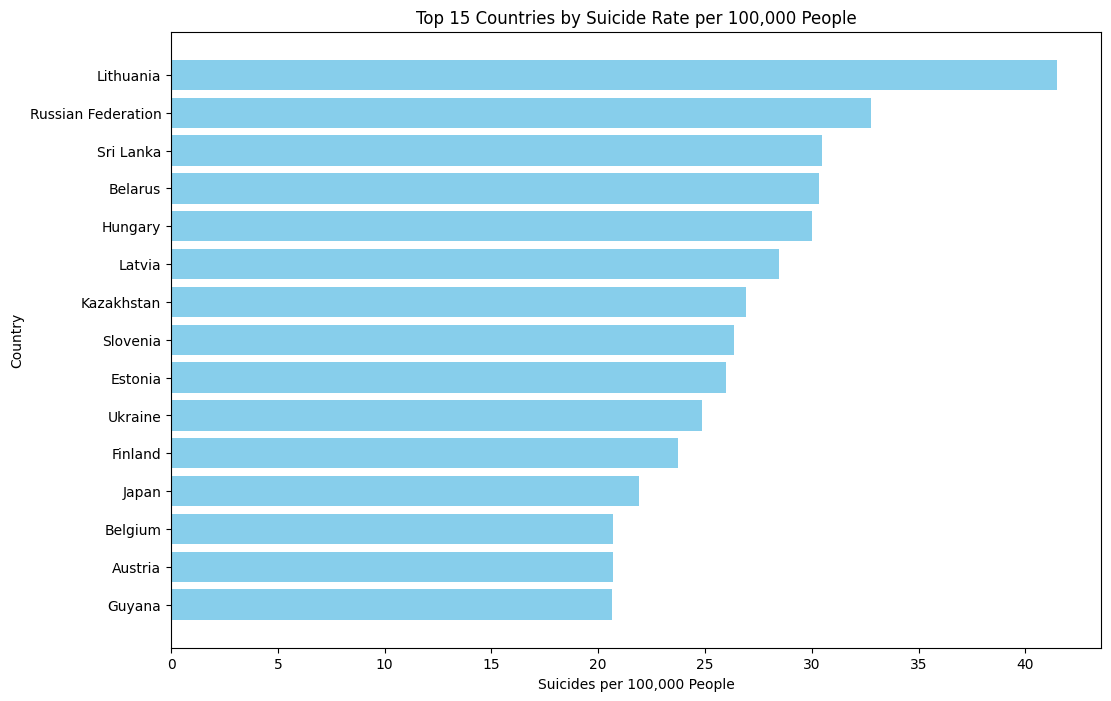

In [26]:
# Group by country and calculate the total suicides and total population
country_data = df.groupby('country').agg({'suicide_count':'sum', 'population':'sum'}).reset_index()
# Calculate the suicide rate per 100,000 people
country_data['suicide_per_100k'] = (country_data['suicide_count'] / country_data['population']) * 100000

# Sort countries by suicide rate per 100,000 people and select the top 15
top_countries_by_rate = country_data.sort_values(by='suicide_per_100k', ascending=False).head(15)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.barh(top_countries_by_rate['country'], top_countries_by_rate['suicide_per_100k'], color='skyblue')
plt.xlabel('Suicides per 100,000 People')
plt.ylabel('Country')
plt.title('Top 15 Countries by Suicide Rate per 100,000 People')
plt.gca().invert_yaxis()  # To display the country with the highest rate at the top
plt.show()

In [27]:
top_countries_by_rate.head()

,country,suicide_count,population,suicide_per_100k
52,Lithuania,27217,65639914,41.464101
74,Russian Federation,1209742,3690802620,32.777207
86,Sri Lanka,55641,182525626,30.483939
11,Belarus,59892,197372292,30.344685
40,Hungary,72130,240253886,30.022407


#### Lithuania is the country with the highest suicide rate per 100k population

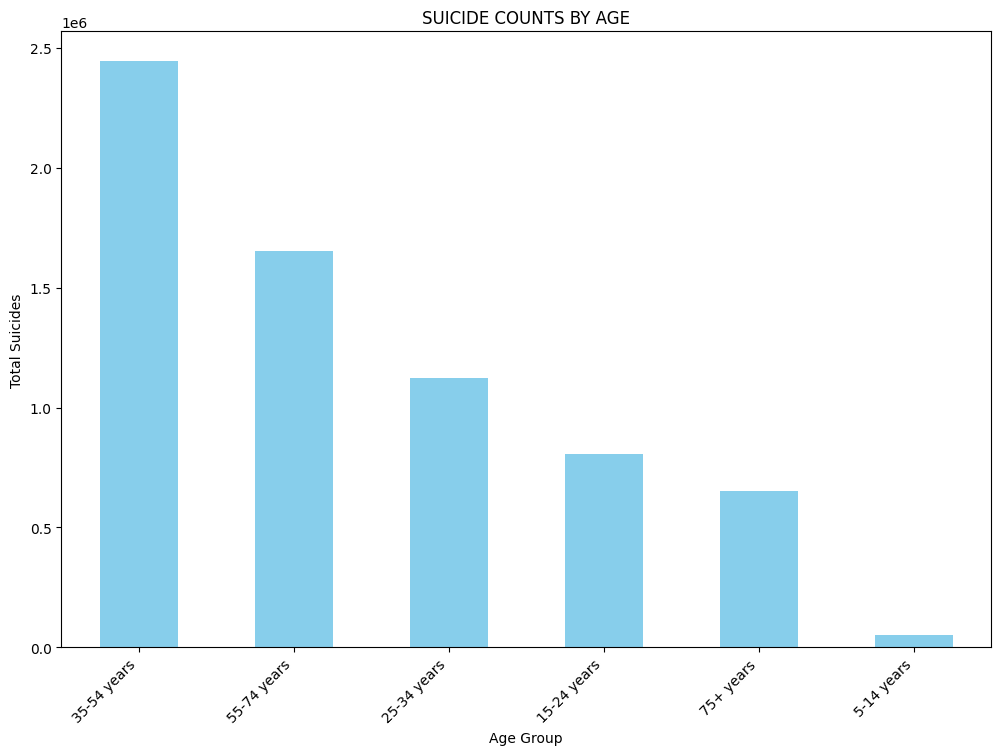

In [28]:
import matplotlib.pyplot as plt

# Calculate total suicides per country
suicides_by_country = df.groupby('age')['suicide_count'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
suicides_by_country.plot(kind='bar', color='skyblue')
plt.title('SUICIDE COUNTS BY AGE')
plt.xlabel('Age Group')
plt.ylabel('Total Suicides')
plt.xticks(rotation=45, ha='right')
plt.show()

#### The people of the age group 35 - 54 years committed most number of suicides, where as the people of the age group 5-14 committted less number of suicides.

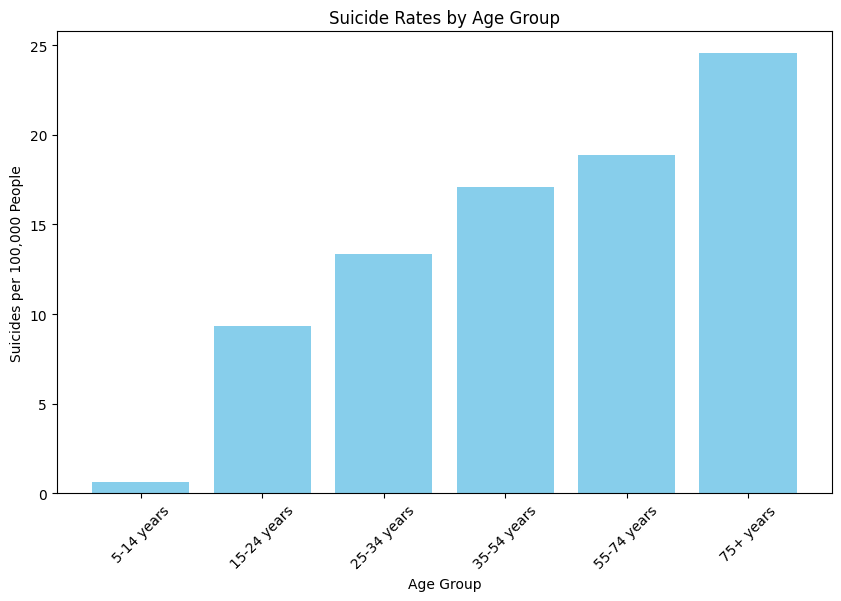

In [29]:
# Group by age and calculate the total suicides and total population
age_data = df.groupby('age').agg({'suicide_count':'sum', 'population':'sum'}).reset_index()
# Calculate the suicide rate per 100,000 people
age_data['suicide_per_100k'] = (age_data['suicide_count'] / age_data['population']) * 100000

# Sorting age groups for better visualization (optional, depends on how your age groups are formatted)
age_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
age_data['age'] = pd.Categorical(age_data['age'], categories=age_order, ordered=True)
age_data = age_data.sort_values('age')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(age_data['age'], age_data['suicide_per_100k'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Suicides per 100,000 People')
plt.title('Suicide Rates by Age Group')
plt.xticks(rotation=45)  # Improve label visibility
plt.show()

#### The people of age 75+ has the highest suicide rate where the age group of 5-14 years has the lowest suicide rate.

<AxesSubplot: xlabel='gender'>

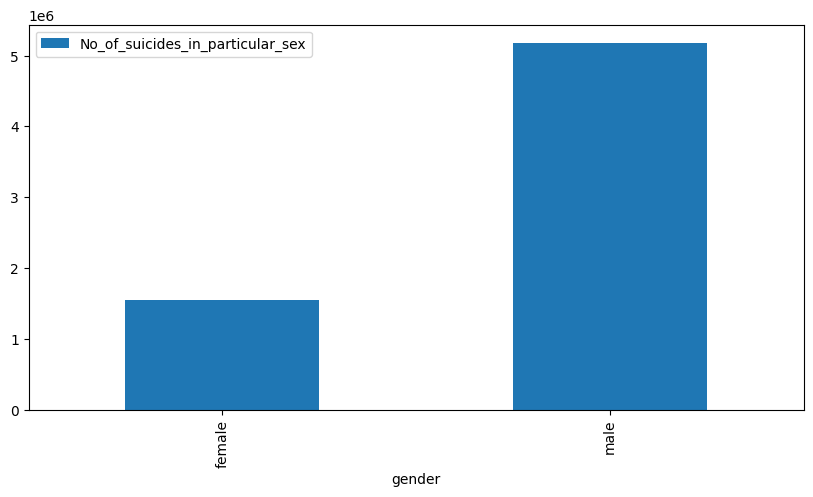

In [30]:

#Suicides per gender
suicides_no_sex = df.groupby('gender', as_index = False)['suicide_count'].sum()
suicides_no_sex.rename(columns = {'gender': 'gender', 'suicide_count':'No_of_suicides_in_particular_sex'}, inplace = True)
suicides_no_sex.head()
suicides_no_sex.plot.bar(x='gender', y='No_of_suicides_in_particular_sex', figsize=(10, 5))

#### Male has committed most number of suicides than female.

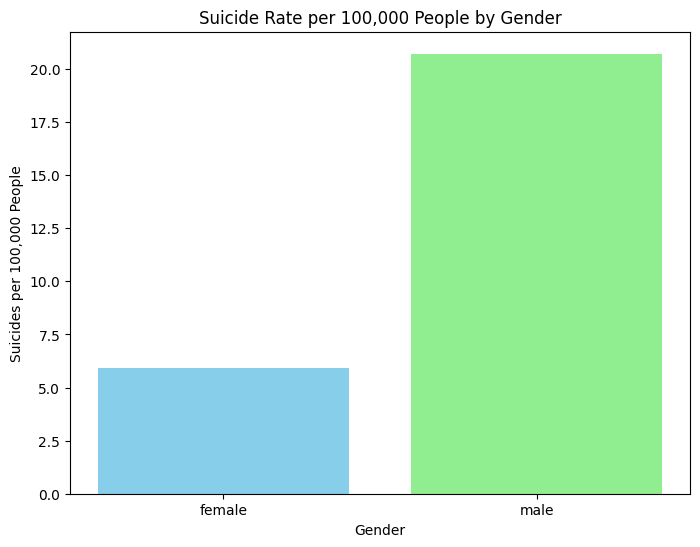

In [31]:
# Group by gender, then calculate the total suicides and total population
gender_data = df.groupby('gender').agg({'suicide_count': 'sum', 'population': 'sum'}).reset_index()

# Calculate the suicide rate per 100,000 people for each gender
gender_data['suicide_per_100k'] = (gender_data['suicide_count'] / gender_data['population']) * 100000

# Plotting the suicide rates by gender
plt.figure(figsize=(8, 6))
plt.bar(gender_data['gender'], gender_data['suicide_per_100k'], color=['skyblue', 'lightgreen'])
plt.xlabel('Gender')
plt.ylabel('Suicides per 100,000 People')
plt.title('Suicide Rate per 100,000 People by Gender')
plt.show()

#### Suicide rate is higher in male than female.

<AxesSubplot: xlabel='year', ylabel='suicide_count'>

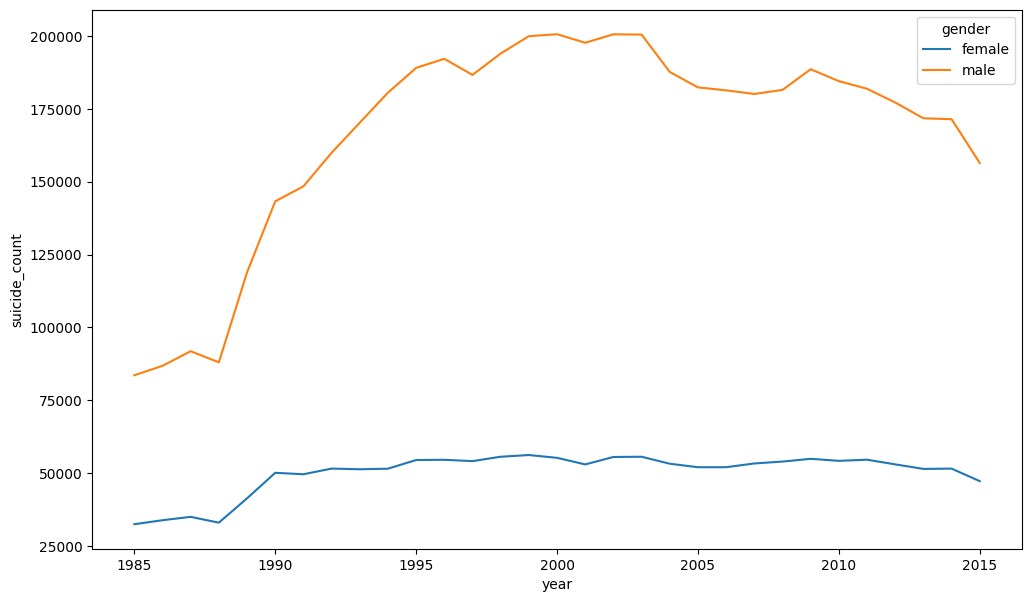

In [32]:
#Suicide rate trend over the years - based on gender
sort_by_year = df.groupby (['year','gender'])['suicide_count'].sum().reset_index()
plt.figure(figsize=(12,7))
sns.lineplot (x = 'year', y = 'suicide_count', hue = 'gender' ,data = sort_by_year)

#### Suicide count is higher in Male has always been the hightest when compared to Female over the years.

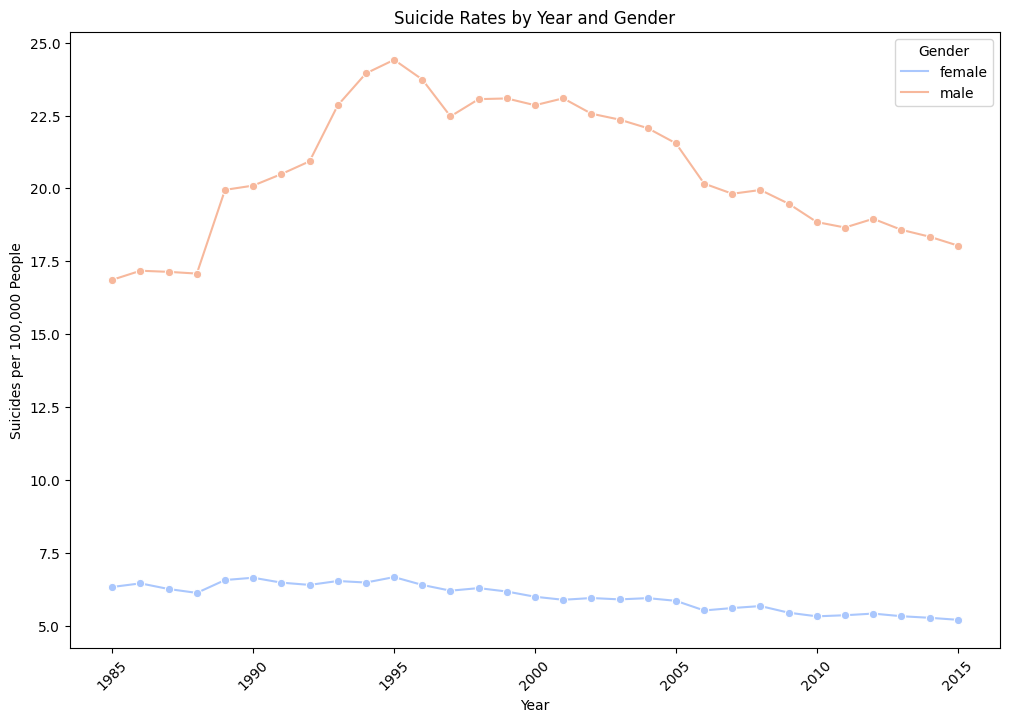

In [33]:
# Group by year and gender, then calculate the total suicides and total population
year_gender_data = df.groupby(['year', 'gender']).agg({'suicide_count':'sum', 'population':'sum'}).reset_index()
# Calculate the suicide rate per 100,000 people
year_gender_data['suicide_per_100k'] = (year_gender_data['suicide_count'] / year_gender_data['population']) * 100000

# Plotting the results with gender hue
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='suicide_per_100k', hue='gender', data=year_gender_data, palette='coolwarm', marker='o')
plt.xlabel('Year')
plt.ylabel('Suicides per 100,000 People')
plt.title('Suicide Rates by Year and Gender')
plt.xticks(rotation=45)  # Improve label visibility
plt.legend(title='Gender')
plt.show()

#### Suicide rate is higher in Male has always been the hightest when compared to Female over the years, and it is higher in the year 1995

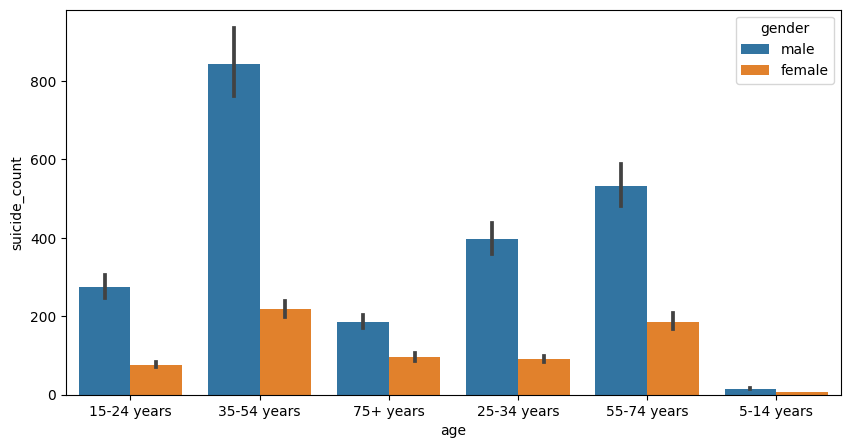

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x = "age", y = "suicide_count", hue = "gender", data = df)
plt.show()
     

#### Irrespective of the age group number of suicides are more in Males than Females

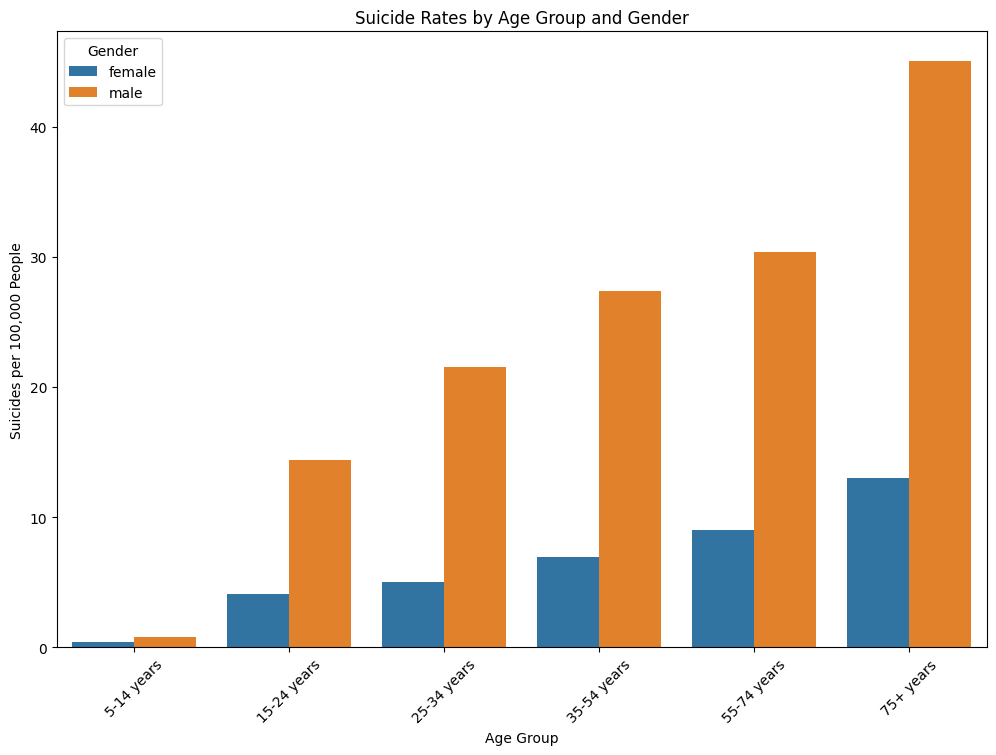

In [35]:
# Group by age and gender, then calculate the total suicides and total population
age_gender_data = df.groupby(['age', 'gender']).agg({'suicide_count':'sum', 'population':'sum'}).reset_index()
# Calculate the suicide rate per 100,000 people
age_gender_data['suicide_per_100k'] = (age_gender_data['suicide_count'] / age_gender_data['population']) * 100000

# Sorting age groups for better visualization
age_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
age_gender_data['age'] = pd.Categorical(age_gender_data['age'], categories=age_order, ordered=True)
age_gender_data = age_gender_data.sort_values('age')

# Plotting the results with gender hue
plt.figure(figsize=(12, 8))
sns.barplot(x='age', y='suicide_per_100k', hue='gender', data=age_gender_data)
plt.xlabel('Age Group')
plt.ylabel('Suicides per 100,000 People')
plt.title('Suicide Rates by Age Group and Gender')
plt.xticks(rotation=45)  # Improve label visibility
plt.legend(title='Gender')
plt.show()

#### Irrespective of the age group suicide rate is higher in Males than Females

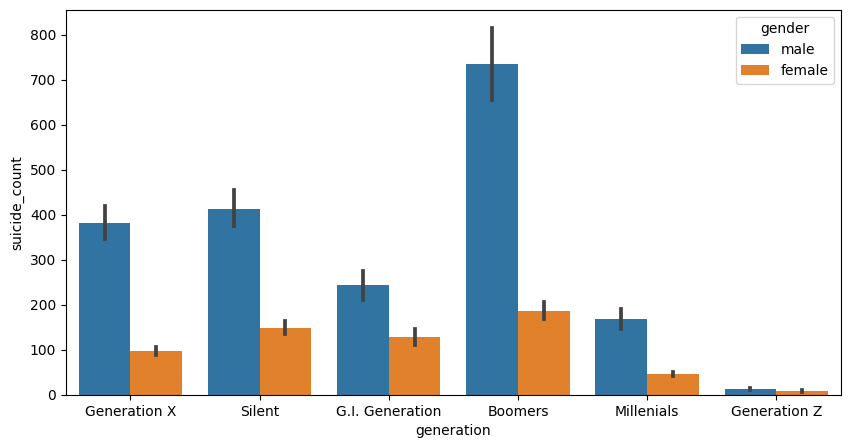

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(x = "generation", y = "suicide_count", hue = "gender", data = df)
plt.show()

#### Boomers is the generation with most number of suicides for both males and females

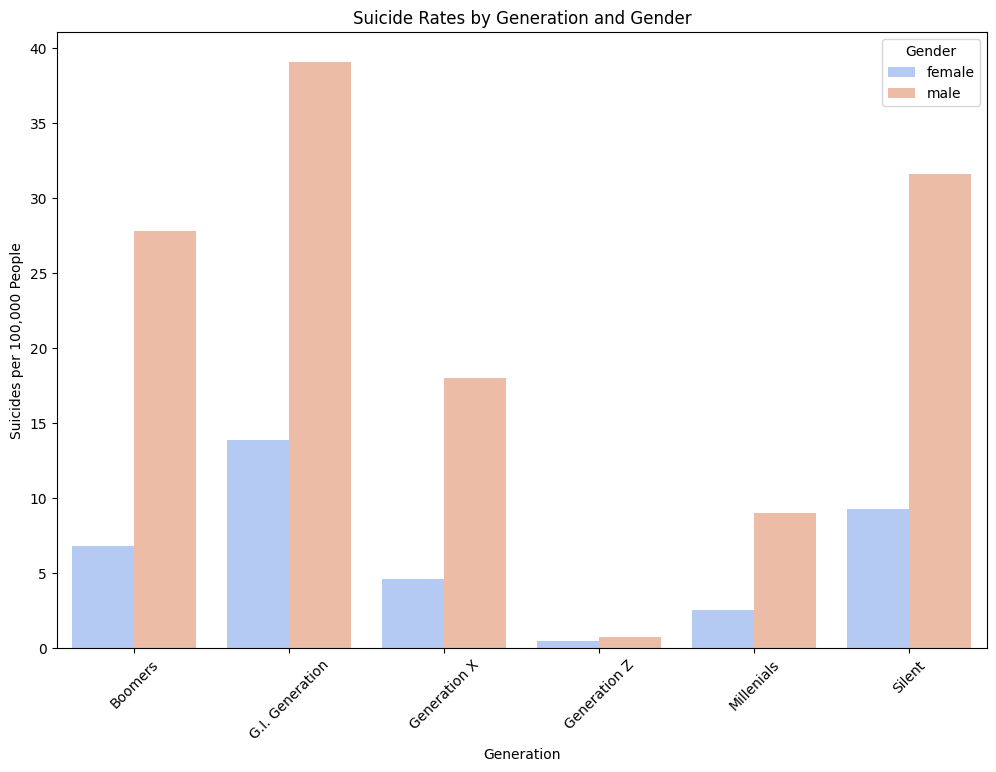

In [37]:
# Group by generation and gender, then calculate the total suicides and total population
generation_gender_data = df.groupby(['generation', 'gender']).agg({'suicide_count': 'sum', 'population': 'sum'}).reset_index()
# Calculate the suicide rate per 100,000 people
generation_gender_data['suicide_per_100k'] = (generation_gender_data['suicide_count'] / generation_gender_data['population']) * 100000

# Plotting the results with gender hue
plt.figure(figsize=(12, 8))
sns.barplot(x='generation', y='suicide_per_100k', hue='gender', data=generation_gender_data, palette='coolwarm')
plt.xlabel('Generation')
plt.ylabel('Suicides per 100,000 People')
plt.title('Suicide Rates by Generation and Gender')
plt.xticks(rotation=45)  # Improve label visibility
plt.legend(title='Gender')
plt.show()


#### G.I Generation is the generation with the highest suicide rate for both Males and Females

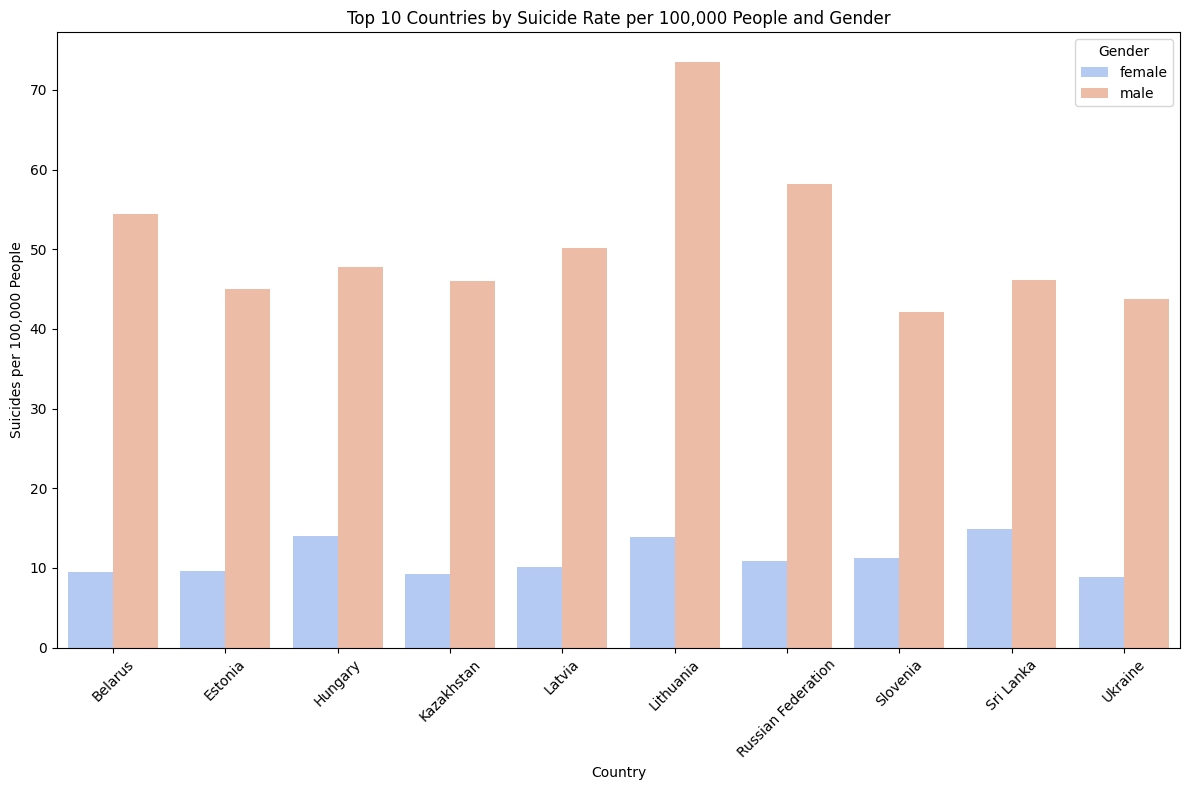

In [38]:
# Group by country and gender, calculate total suicides and total population
country_gender_data = df.groupby(['country', 'gender']).agg({'suicide_count': 'sum', 'population': 'sum'}).reset_index()
# Calculate suicide rate per 100,000 people
country_gender_data['suicide_per_100k'] = (country_gender_data['suicide_count'] / country_gender_data['population']) * 100000

# Determine the overall suicide rate per country to find the top 10
overall_country_rate = country_gender_data.groupby('country')['suicide_per_100k'].mean().reset_index()
top_10_countries = overall_country_rate.nlargest(10, 'suicide_per_100k')['country']

# Filter the original dataset to include only the top 10 countries
top_country_gender_data = country_gender_data[country_gender_data['country'].isin(top_10_countries)]

# Plotting the results with gender hue
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='suicide_per_100k', hue='gender', data=top_country_gender_data, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Suicides per 100,000 People')
plt.title('Top 10 Countries by Suicide Rate per 100,000 People and Gender')
plt.legend(title='Gender')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


#### Lithuania is the country with the highest suicide rate for male and Srilank is the country with highest suicide rate for Female.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#### Country, year, sex, age and generation are all non-numerical labeled columns that will be transformed to numerical labels using SkLearn's LabelEncoder.


In [40]:
import sklearn
from sklearn.preprocessing import LabelEncoder
categorical = ['country','gender','age', 'generation']
le = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    df[column] = le.fit_transform(df[column])

In [41]:
df.head()

,country,year,gender,age,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,1987,1,0,21,312900,6.71,2.156625e+09,796,2
1,0,1987,1,2,16,308000,5.19,2.156625e+09,796,5
2,0,1987,0,0,14,289700,4.83,2.156625e+09,796,2
3,0,1987,1,5,1,21800,4.59,2.156625e+09,796,1
4,0,1987,1,1,9,274300,3.28,2.156625e+09,796,0


Many machine learning estimators need dataset standardization: if the individual features do not resemble standard normally distributed data, they may perform poorly. SkLearn's RobustScaler is used to normalize the numerical columns population, gdp_for_year, and gdp_per_capita

In [42]:
numerical = ['suicide_count', 'population', 'suicide_rate', 
              'gdp_for_year','gdp_per_capita']

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
df[numerical] = rc.fit_transform(df[numerical])

In [43]:
df.head(5)

,country,year,gender,age,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,1987,1,0,-0.031008,-0.084553,0.046519,-0.182533,-0.397331,2
1,0,1987,1,2,-0.069767,-0.088069,-0.050343,-0.182533,-0.397331,5
2,0,1987,0,0,-0.085271,-0.101202,-0.073283,-0.182533,-0.397331,2
3,0,1987,1,5,-0.186047,-0.293450,-0.088577,-0.182533,-0.397331,1
4,0,1987,1,1,-0.124031,-0.112253,-0.172057,-0.182533,-0.397331,0


#### Separating the targets from the predictors and creating the train test split


In [44]:
X = df.drop('suicide_rate',axis=1)
y = df['suicide_rate']
X.shape, y.shape

((27660, 9), (27660,))

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
X_train.shape, X_test.shape

((22128, 9), (5532, 9))

## K-Nearest Neighbors Regression Model:

In [46]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# instantiate the model
knn = KNeighborsRegressor()

param_grid = {'n_neighbors':list(range(1, 31)), 'weights': ['uniform', 'distance']}

# instantiate the grid
knn_grid = GridSearchCV(knn, param_grid , cv=10)

# fit the model 
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [47]:

#To check best parameters for the model
knn_para = knn_grid.best_params_
print(knn_para)

{'n_neighbors': 2, 'weights': 'distance'}


In [48]:
#predicting the target value
y_train_knn = knn_grid.predict(X_train)
y_test_knn = knn_grid.predict(X_test)

In [49]:
#computing the accuracy of the model performance
acc_train_knn = knn_grid.score(X_train, y_train) 
acc_test_knn = knn_grid.score(X_test, y_test)

#computing root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error
import numpy as np
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print('\nKNN: The RMSE of the training set is:', rmse_train_knn)
print('KNN: The RMSE of the testing set is:', rmse_test_knn)

KNN: Accuracy on training Data: 1.000
KNN: Accuracy on test Data: 0.791

KNN: The RMSE of the training set is: 0.0
KNN: The RMSE of the testing set is: 0.5479126167031657


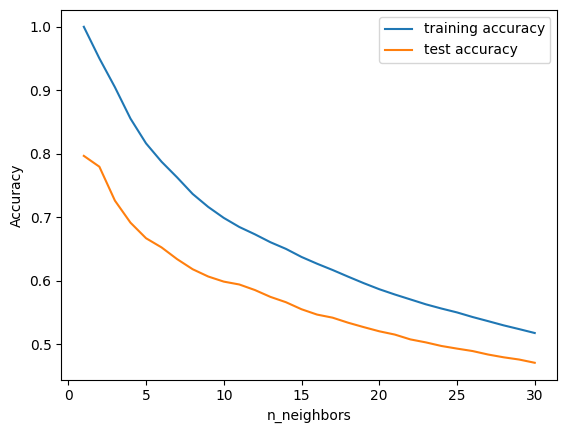

In [50]:

#Training&TestingAccuracy
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 30
neighbors_settings = range(1, 31)
for n in neighbors_settings:
  # fit the model
  knn = KNeighborsRegressor(n_neighbors=n)
  knn.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(knn.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(knn.score(X_test, y_test))

#plotting the training & testing accuracy for n_neighbours from 1 to 30
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()

In [51]:

# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))
  rmse_train.append(round(c, 3))
  rmse_test.append(round(d, 3))

In [52]:
#storing the results.
storeResults('K-NearestNeighbors Regression', acc_train_knn, acc_test_knn, rmse_train_knn, rmse_test_knn)

# DECISSION TREE REGRESSION MODEL

In [53]:

from sklearn.tree import DecisionTreeRegressor
# instantiate the model 
tree = DecisionTreeRegressor(max_depth=9)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [54]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [55]:
#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train, y_train)
acc_test_tree = tree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train_tree)
print('Decision Tree: The RMSE of the testing set is:', rmse_test_tree)

Decision Tree: Accuracy on training Data: 0.972
Decision Tree: Accuracy on test Data: 0.957

Decision Tree: The RMSE of the training set is: 0.20421122384568446
Decision Tree: The RMSE of the testing set is: 0.24941665536484256


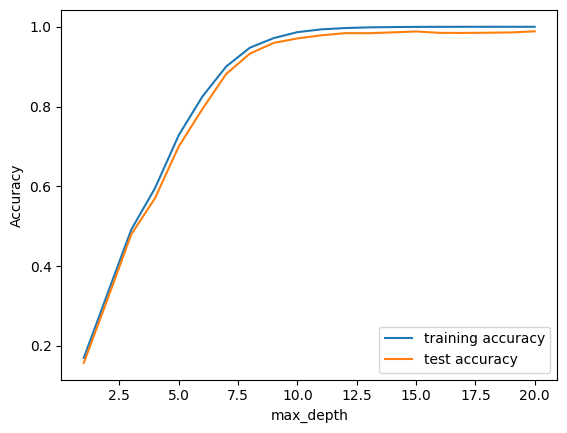

In [56]:
#Training&TestingAccuracy
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 21)
for n in depth:
  # fit the model
  tree = DecisionTreeRegressor(max_depth=n)
  tree.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(tree.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(tree.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

In [57]:
#storing the results.
storeResults('Decision Tree Regression', acc_train_tree, acc_test_tree, rmse_train_tree, rmse_test_tree)

# Random Forest Regression Model:

In [58]:
from sklearn.ensemble import RandomForestRegressor

# instantiate the model
forest = RandomForestRegressor(max_depth=9)

# fit the model 
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=9)

In [59]:
#predicting the target value
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [60]:
#computing the accuracy of the model performance
acc_train_forest = forest.score(X_train, y_train)
acc_test_forest = forest.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))

print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print('\nRandom Forest: The RMSE of the training set is: ', rmse_train_forest)
print('Random Forest: The RMSE of the testing set is: ', rmse_test_forest)

Random Forest: Accuracy on training Data: 0.988
Random Forest: Accuracy on test Data: 0.982

Random Forest: The RMSE of the training set is:  0.1351802313961427
Random Forest: The RMSE of the testing set is:  0.15995284950278524


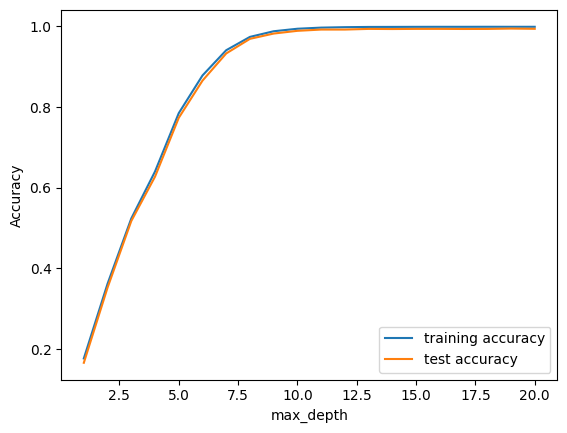

In [61]:
#Training&TestingAccuracy
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 21)
for n in depth:
  # fit the model
  forest = RandomForestRegressor(max_depth=n)
  forest.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(forest.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(forest.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

In [62]:
#storing the results.
storeResults('Random Forest Regression', acc_train_forest, acc_test_forest, rmse_train_forest, rmse_test_forest)

# XGBoost Regression Model :

In [63]:
#XGBoost Regression model
from xgboost import XGBRegressor

# instantiate the model
xgb = XGBRegressor(learning_rate=0.2,max_depth=4)
#fit the model
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [64]:

#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)
     

In [65]:
#computing the accuracy of the model performance
acc_train_xgb = xgb.score(X_train, y_train)
acc_test_xgb = xgb.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_xgb))

print("XGBoost Regression: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Regression: Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print('\nXGBoost Regression: The RMSE of the training set is: ', rmse_train_xgb)
print('XGBoost Regression: The RMSE of the testing set is: ', rmse_test_xgb)


XGBoost Regression: Accuracy on training Data: 0.993
XGBoost Regression: Accuracy on test Data: 0.986

XGBoost Regression: The RMSE of the training set is:  0.10120756715346743
XGBoost Regression: The RMSE of the testing set is:  0.14234859700720937


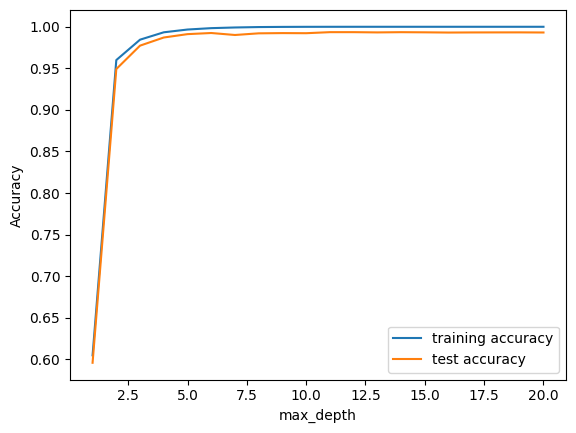

In [66]:
#Training&TestingAccuracy
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 21)
for n in depth:
  # fit the model
  xgb = XGBRegressor(max_depth=n)
  xgb.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(xgb.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(xgb.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()


In [67]:
#storing the results.
storeResults('XGBoost Regression', acc_train_xgb, acc_test_xgb, rmse_train_xgb, rmse_test_xgb)

In [68]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test})
     

In [69]:
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
3,XGBoost Regression,0.993,0.986,0.101,0.142
2,Random Forest Regression,0.988,0.982,0.135,0.160
1,Decision Tree Regression,0.972,0.957,0.204,0.249
0,K-NearestNeighbors Regression,1.000,0.791,0.000,0.548


In [70]:
import joblib

In [71]:
joblib.dump(xgb, 'xg_boost.pkl')

['xg_boost.pkl']